In [1]:
import pandas as pd

In [2]:
player_data = './data/Player Totals.csv'

In [3]:
import dask.dataframe as dd

# Carregar DataFrame como Dask DataFrame
ddf = dd.read_csv(player_data, assume_missing=True)

# Agrupando dados por jogador e temporada
grouped_ddf = ddf.groupby(['season', 'player_id', 'player', 'pos', 'age', 'experience']).agg({
    'g': 'sum',
    'gs': 'sum',
    'mp': 'sum',
    'fg': 'sum',
    'fga': 'sum',
    'fg_percent': 'mean',
    'x3p': 'sum',
    'x3pa': 'sum',
    'x3p_percent': 'mean',
    'x2p': 'sum',
    'x2pa': 'sum',
    'x2p_percent': 'mean',
    'e_fg_percent': 'mean',
    'ft': 'sum',
    'fta': 'sum',
    'ft_percent': 'mean',
    'orb': 'sum',
    'drb': 'sum',
    'trb': 'sum',
    'ast': 'sum',
    'stl': 'sum',
    'blk': 'sum',
    'tov': 'sum',
    'pf': 'sum',
    'pts': 'sum'
}).reset_index()

# Convertendo para Pandas DataFrame
grouped_df = grouped_ddf.compute()


In [4]:
# Verificando informações iniciais do DataFrame
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26521 entries, 0 to 26520
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        26521 non-null  float64
 1   player_id     26521 non-null  float64
 2   player        26521 non-null  object 
 3   pos           26521 non-null  object 
 4   age           26521 non-null  float64
 5   experience    26521 non-null  float64
 6   g             26521 non-null  float64
 7   gs            26521 non-null  float64
 8   mp            26521 non-null  float64
 9   fg            26521 non-null  float64
 10  fga           26521 non-null  float64
 11  fg_percent    26426 non-null  float64
 12  x3p           26521 non-null  float64
 13  x3pa          26521 non-null  float64
 14  x3p_percent   18124 non-null  float64
 15  x2p           26521 non-null  float64
 16  x2pa          26521 non-null  float64
 17  x2p_percent   26378 non-null  float64
 18  e_fg_percent  26426 non-nu

In [5]:
# Verificando dados estatísticos de cada coluna
grouped_df.describe()

,season,player_id,age,experience,g,gs,mp,fg,fga,fg_percent,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26426.000000,...,25693.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000,26521.000000
mean,1995.037442,2652.343200,26.415407,4.940048,58.636665,19.735229,1350.219336,226.263301,500.181177,0.433152,...,0.723430,61.241243,149.212209,253.925719,131.881980,37.566268,23.150371,70.197165,132.271483,593.678406
std,20.200208,1295.656866,3.893474,3.752268,31.343749,29.292818,1053.855871,206.973824,441.707585,0.095751,...,0.138466,75.800929,165.894811,254.843447,149.462478,41.861585,37.974636,77.219489,96.243214,544.523921
min,1947.000000,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,1647.000000,23.000000,2.000000,37.000000,0.000000,392.000000,56.000000,135.000000,0.395000,...,0.662000,5.000000,15.000000,63.000000,25.000000,2.000000,1.000000,4.000000,52.000000,148.000000
50%,1998.000000,2730.000000,26.000000,4.000000,65.000000,2.000000,1239.000000,175.000000,395.000000,0.440000,...,0.747000,33.000000,102.000000,187.000000,83.000000,25.000000,9.000000,46.000000,125.000000,455.000000
75%,2012.000000,3704.000000,29.000000,7.000000,78.000000,34.000000,2134.000000,341.000000,756.000000,0.482000,...,0.811000,89.000000,222.000000,358.000000,185.000000,59.000000,28.000000,111.000000,196.000000,896.000000
max,2024.000000,5209.000000,46.000000,22.000000,180.000000,166.000000,6704.000000,2126.000000,4166.000000,1.000000,...,1.000000,874.000000,1514.000000,3346.000000,1870.000000,364.000000,614.000000,720.000000,694.000000,5068.000000


In [6]:
# Removendo linhas duplicadas
grouped_df = grouped_df.drop_duplicates()

In [7]:
# Preenchendo colunas percentuais com a média da coluna
percent_cols = ['fg_percent', 'x3p_percent', 'x2p_percent', 'e_fg_percent', 'ft_percent']
for col in percent_cols:
    grouped_df[col] = grouped_df[col].fillna(grouped_df[col].mean())

# Preenchendo colunas de estatísticas com a média (ou 0, se mais apropriado)
stats_cols = ['orb', 'drb', 'trb', 'stl', 'blk', 'tov']
for col in stats_cols:
    grouped_df[col] = grouped_df[col].fillna(0)


In [8]:
# Certificando que todas as colunas possuem os tipos de dados corretos
grouped_df['season'] = grouped_df['season'].astype('int16')
grouped_df['player_id'] = grouped_df['player_id'].astype('int32')
grouped_df['age'] = grouped_df['age'].astype('float32')
grouped_df['experience'] = grouped_df['experience'].astype('int8')
grouped_df['player'] = grouped_df['player'].astype('string')
grouped_df['pos'] = grouped_df['pos'].astype('string')

In [9]:
# Verificando se ainda há valores faltantes
print(grouped_df.isnull().sum())

# Verificando os tipos de dados
print(grouped_df.dtypes)

# Exibindo uma amostra dos dados tratados
print(grouped_df.head())

season          0
player_id       0
player          0
pos             0
age             0
experience      0
g               0
gs              0
mp              0
fg              0
fga             0
fg_percent      0
x3p             0
x3pa            0
x3p_percent     0
x2p             0
x2pa            0
x2p_percent     0
e_fg_percent    0
ft              0
fta             0
ft_percent      0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
dtype: int64
season                   int16
player_id                int32
player          string[python]
pos             string[python]
age                    float32
experience                int8
g                      float64
gs                     float64
mp                     float64
fg                     float64
fga                    float64
fg_percent             float64
x3p                    float64
x3pa                   flo

In [10]:
# Agrupamento das estatísticas por jogador, posição e ano
player_stats = grouped_df.groupby(['pos', 'season', 'player_id']).agg({
    'pts': 'sum',
    'ast': 'sum',
    'trb': 'sum',
    'stl': 'sum',
    'blk': 'sum'
}).reset_index()

# Agrupamento das estatísticas por posição e ano, tirando a média por jogador
stats_by_position = player_stats.groupby(['pos', 'season']).agg({
    'pts': 'mean',
    'ast': 'mean',
    'trb': 'mean',
    'stl': 'mean',
    'blk': 'mean',
    'player_id': 'count'  # Contar o número de jogadores por posição e ano
}).rename(columns={'player_id': 'num_players'}).round(2)

# Exibindo as estatísticas por posição e ano
print("Estatísticas Médias por Posição e Ano:")
print(stats_by_position)

# Salvando as estatísticas por posição e ano em um arquivo CSV
stats_by_position.to_csv('./out/stats_by_position_year.csv')

Estatísticas Médias por Posição e Ano:
                 pts     ast     trb   stl    blk  num_players
pos   season                                                  
C     1947    295.44   22.50    0.00   0.0   0.00           16
      1948    460.89   34.67    0.00   0.0   0.00            9
      1949    579.00  101.33    0.00   0.0   0.00           15
      1950    604.78   97.13    0.00   0.0   0.00           23
      1951    859.40  133.73  580.87   0.0   0.00           15
...              ...     ...     ...   ...    ...          ...
SG-SF 2016    107.00   49.00   53.00  10.0   1.00            1
      2019    366.00  128.00  126.00  29.0  15.00            1
      2020    172.00   33.00   77.00  15.0   4.00            1
      2021    943.50  115.00  243.50  61.5  21.00            2
      2022     64.00   10.33   30.33   6.0   3.33            3

[721 rows x 6 columns]


    age     pts      mp  pts_per_48min
0  24.0   252.0   614.0      19.700326
1  23.0   136.0   311.0      20.990354
2  20.0    48.0   171.0      13.473684
3  28.0  1013.0  2297.0      21.168481
4  27.0   514.0  1269.0      19.442080


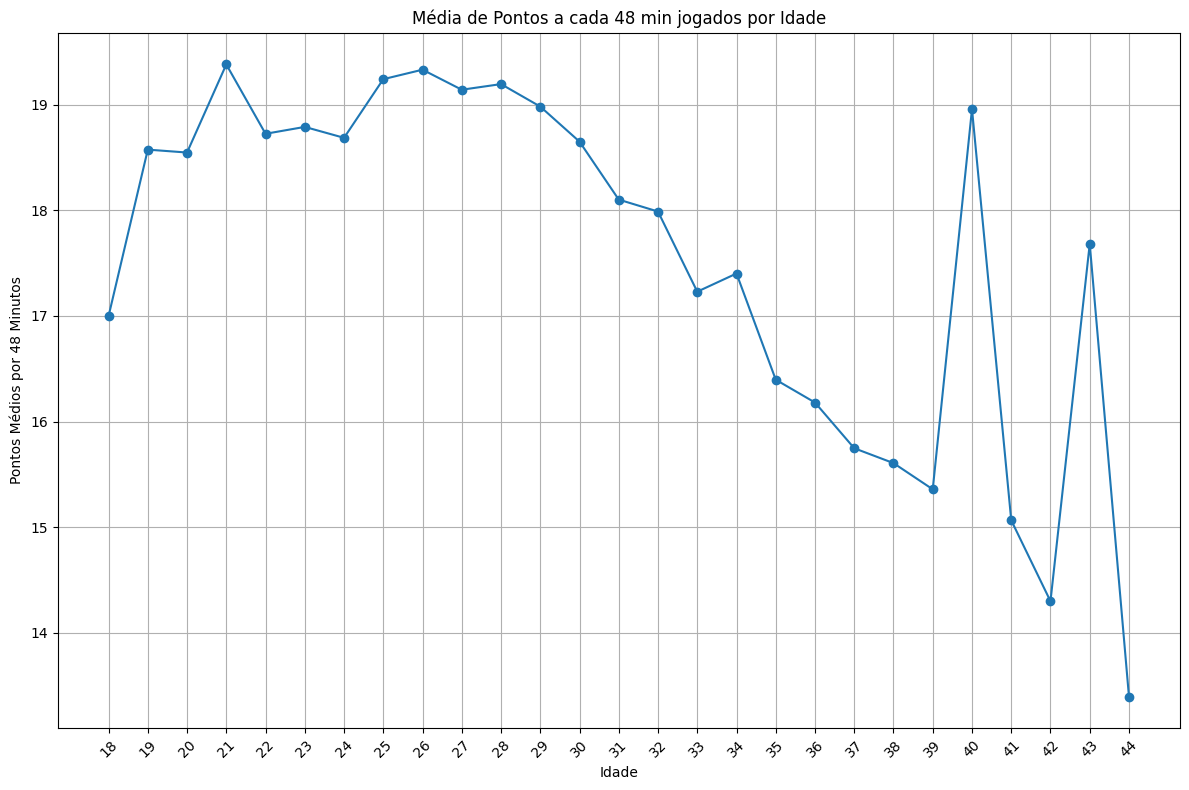

In [11]:
import matplotlib.pyplot as plt

# Filtrar jogadores com minutos jogados > 0
pts_per_48min_df = grouped_df[grouped_df['mp'] > 0].copy()

# Calcular pontos por 48 minutos
pts_per_48min_df.loc[:, 'pts_per_48min'] = (pts_per_48min_df['pts'] / pts_per_48min_df['mp']) * 48

# Verificar os cálculos
print(pts_per_48min_df[['age', 'pts', 'mp', 'pts_per_48min']].head())

# Calcular a média de pontos por 48 minutos por idade
mean_pts_per_48min_by_age = pts_per_48min_df.groupby('age')['pts_per_48min'].mean()

# Plotar o gráfico
plt.figure(figsize=(12, 8))  # Aumenta o tamanho da figura
mean_pts_per_48min_by_age.plot(kind='line', marker='o', linestyle='-')
plt.title('Média de Pontos a cada 48 min jogados por Idade')
plt.xlabel('Idade')
plt.ylabel('Pontos Médios por 48 Minutos')
plt.xticks(ticks=range(int(pts_per_48min_df['age'].min()), int(pts_per_48min_df['age'].max()) + 1), rotation=45)  # Ajusta os ticks do eixo x
plt.grid(True)
plt.tight_layout()  # Ajusta o layout para garantir que os rótulos não sejam cortados
plt.savefig('./out/average_points_per_48min_by_age.png')
plt.show()


In [12]:
# Salvando as estatísticas descritivas em um arquivo CSV
grouped_df.to_csv('./out/player_totals_updated.csv')

In [13]:
# Selecionando as colunas relevantes para a análise descritiva
cols_of_interest = ['pts', 'ast', 'trb', 'blk']

# Calculando as estatísticas descritivas por temporada
descriptive_stats = grouped_df.groupby('season')[cols_of_interest].agg(['mean', 'median', 'min', 'max']).round(2)

# Exibindo as estatísticas descritivas
print('Estatísticas Descritivas por Temporada:')
print(descriptive_stats)

Estatísticas Descritivas por Temporada:
           pts                         ast                         trb         \
          mean median  min     max    mean median  min     max    mean median   
season                                                                          
1947    319.59  256.0  0.0  1754.0   32.61   22.0  0.0   202.0    0.00    0.0   
1948    303.78  253.0  0.0  1048.0   28.68   19.0  0.0   120.0    0.00    0.0   
1949    408.15  336.5  0.0  1698.0   94.36   77.5  0.0   342.0    0.00    0.0   
1950    464.40  433.0  0.0  1865.0  114.33  100.0  0.0   414.0    0.00    0.0   
1951    513.37  443.0  2.0  1932.0  126.68  119.0  0.0   510.0  285.24  228.0   
...        ...    ...  ...     ...     ...    ...  ...     ...     ...    ...   
2020    455.22  323.0  0.0  2350.0   98.48   56.0  0.0   684.0  184.07  131.0   
2021    473.32  354.0  0.0  3278.0  105.00   68.5  0.0   763.0  189.14  150.0   
2022    476.37  333.0  0.0  2864.0  107.47   63.0  0.0  1334.0  192.7

In [14]:
# Salvando as estatísticas descritivas em um arquivo CSV
descriptive_stats.to_csv('./out/estatisticas_descritivas_por_temporada.csv')

In [15]:
# Selecionando as colunas de interesse para a análise de correlação
cols_of_interest = ['pts', 'ast', 'trb', 'blk']

# Calculando a matriz de correlação
correlation_matrix = grouped_df[cols_of_interest].corr().round(2)

# Exibindo a matriz de correlação
print("Matriz de Correlação:")
print(correlation_matrix)

# Salvando a matriz de correlação em um arquivo CSV
correlation_matrix.to_csv('./out/matriz_de_correlacao.csv')

Matriz de Correlação:
      pts   ast   trb   blk
pts  1.00  0.71  0.72  0.37
ast  0.71  1.00  0.38  0.12
trb  0.72  0.38  1.00  0.56
blk  0.37  0.12  0.56  1.00
